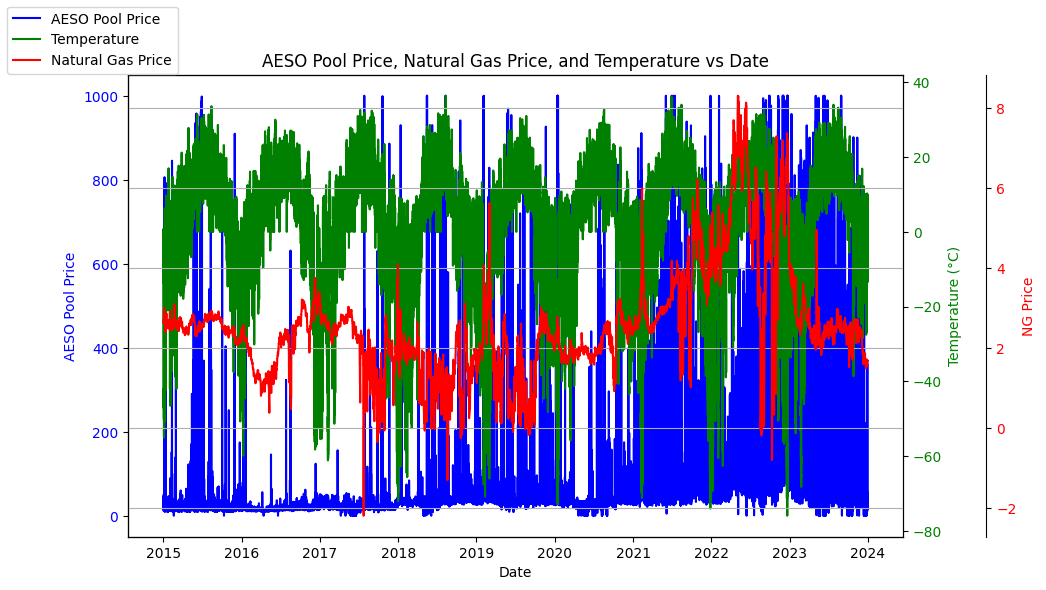

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
data = pd.read_csv('Merged Data.csv', parse_dates=['Date'])

# Create a single plot with separate y-axes for temperature and NG price
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Pool Price
ax1.plot(data['Date'], data['AESO Pool Price CAD/MWh'], label='AESO Pool Price', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('AESO Pool Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the temperature
ax2 = ax1.twinx()
ax2.plot(data['Date'], data['Temp Calgary deg C'], label='Temperature', color='green')
ax2.set_ylabel('Temperature (°C)', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Create a third y-axis for the NG price
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the right spine of ax3
ax3.plot(data['Date'], data['AECO 2A CAD/GJ'], label='Natural Gas Price', color='red')
ax3.set_ylabel('NG Price', color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Add a legend with custom handles
handles, labels = [], []
for ax in [ax1, ax2, ax3]:
    for h, l in zip(*ax.get_legend_handles_labels()):
        handles.append(h)
        labels.append(l)
fig.legend(handles, labels, loc='upper left')

plt.title("AESO Pool Price, Natural Gas Price, and Temperature vs Date")
plt.grid(True)
plt.show()

KeyError: 'DateTime'

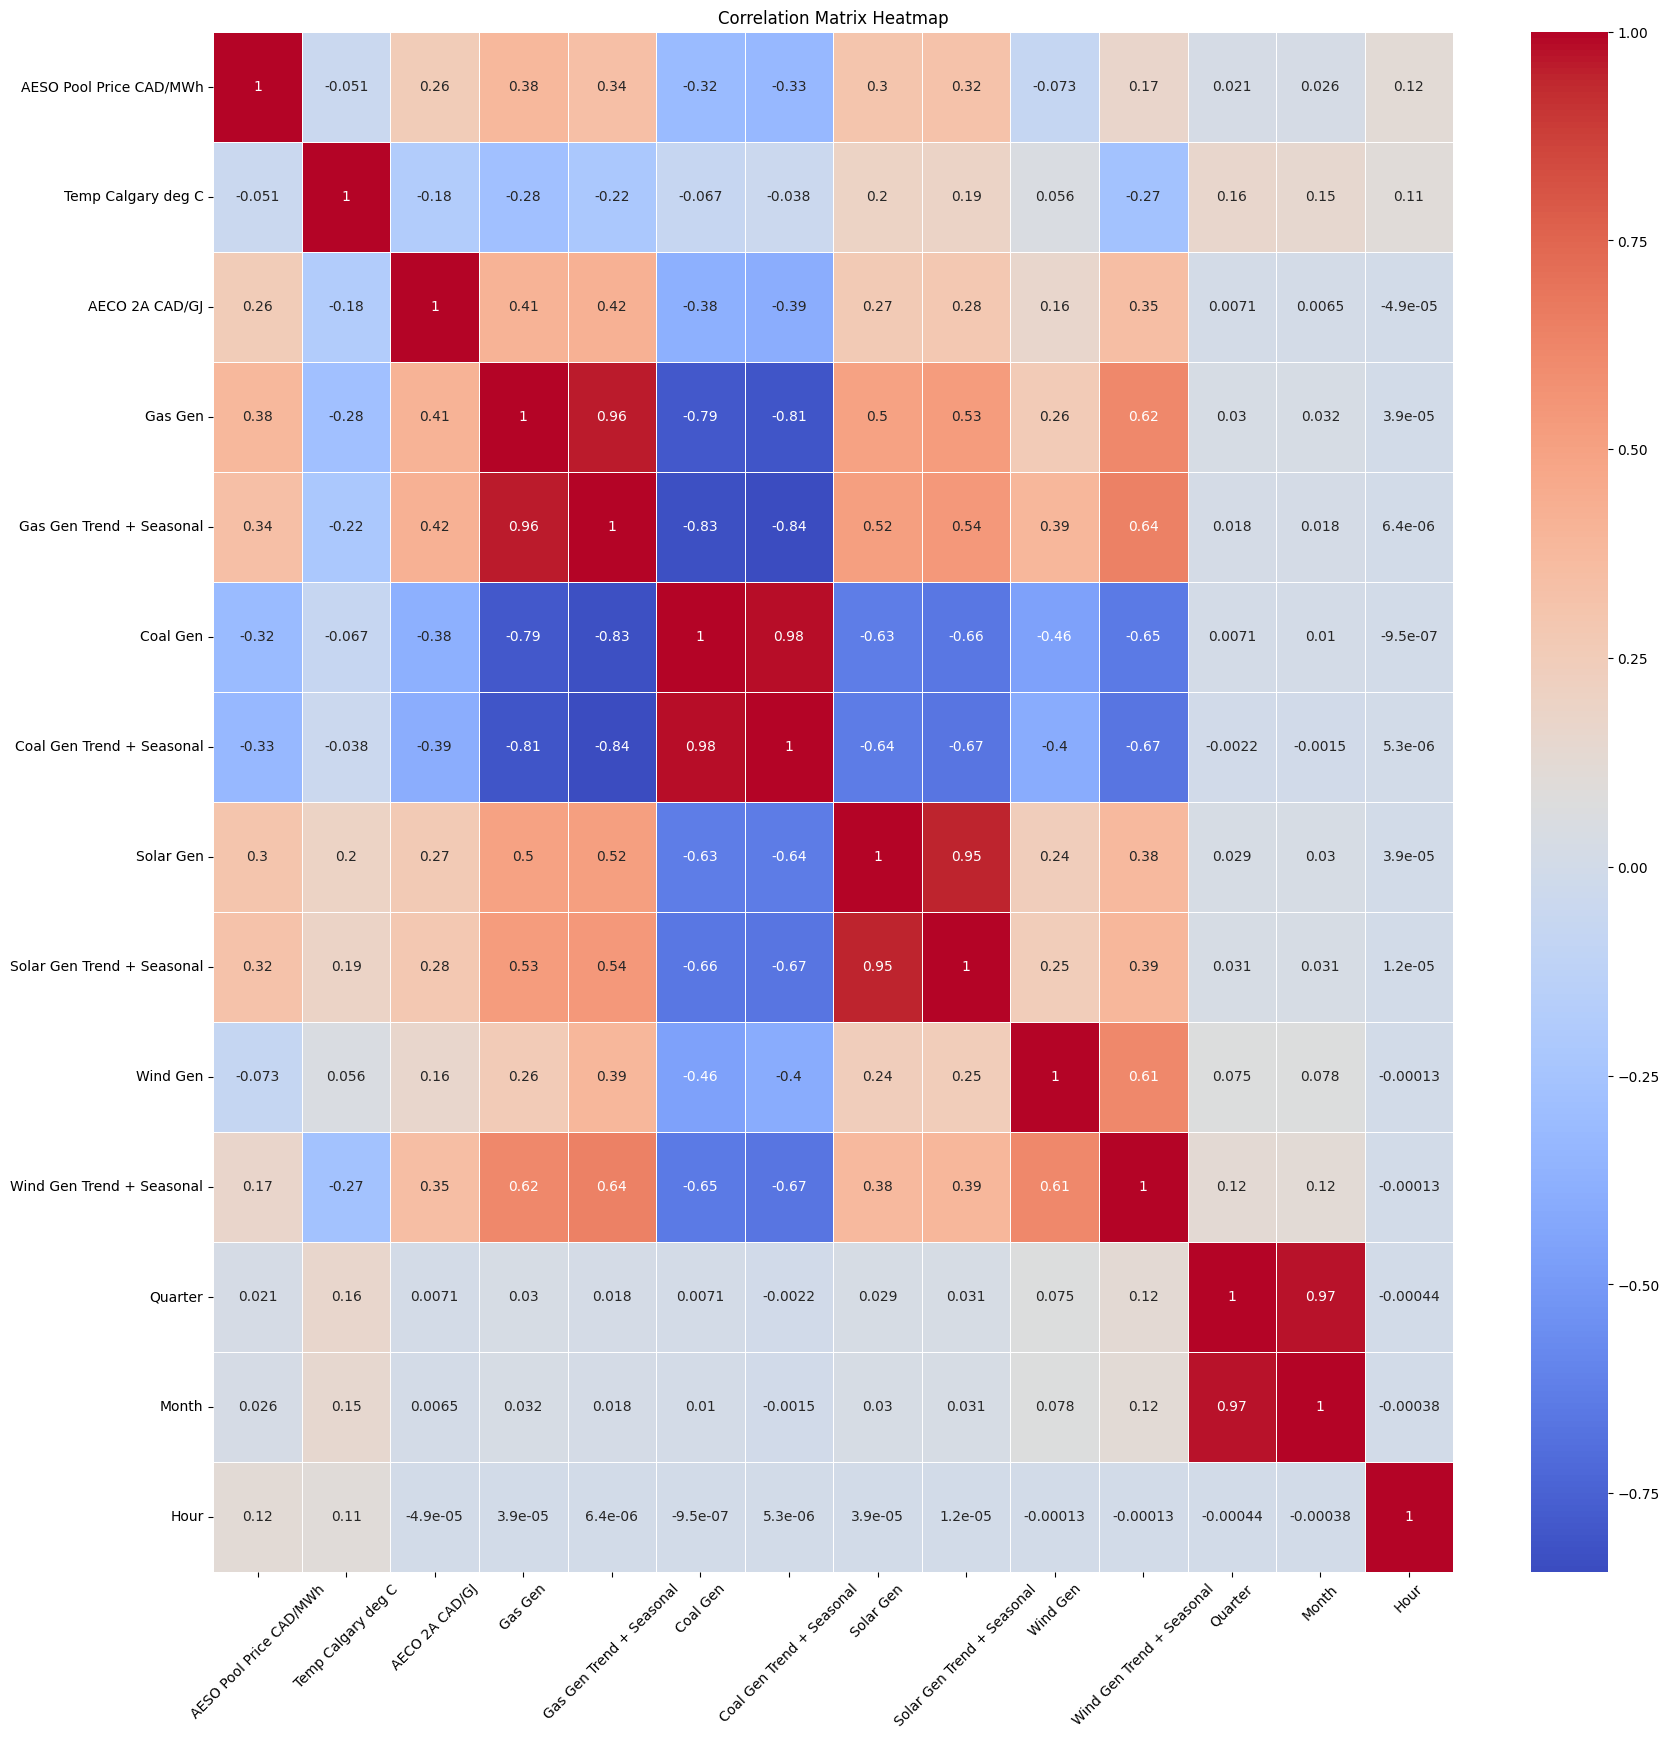

In [22]:
data_numeric = data.drop(['Date','Date Daily'], axis=1)

correlation_matrix = data_numeric.corr()

# Create a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Customize the plot (optional)
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

In [ ]:
data.head()

,DateTime,pool_price,forecast_pool_price,rolling_30day_avg,Longitude (x),Latitude (y),Climate ID,Temp (°C),Dew Point Temp (°C),Rel Hum (%),...,Wind Chill,NG_price,Coal,Trend_Coal,Gas,Trend_Gas,Solar,Trend_Solar,Wind,Trend_Wind
0,2018-02-16 00:00:00,22.10,20.58,31.73,-114.01,51.12,3031092,-2.3,-17.9,30.0,...,-11.0,1.9434,76206.83603,82201.93117,123494.2905,131891.2669,52.723999,2.631894,19336.487,12246.76825
1,2018-02-16 01:00:00,22.67,19.01,31.72,-114.01,51.12,3031092,-2.4,-16.4,34.0,...,-9.0,1.9434,76206.83603,82201.93117,123494.2905,131891.2669,52.723999,2.631894,19336.487,12246.76825
2,2018-02-16 02:00:00,23.39,23.15,31.72,-114.01,51.12,3031092,-2.5,-16.5,34.0,...,-10.0,1.9434,76206.83603,82201.93117,123494.2905,131891.2669,52.723999,2.631894,19336.487,12246.76825
3,2018-02-16 03:00:00,23.60,25.29,31.71,-114.01,51.12,3031092,-3.0,-15.9,37.0,...,-11.0,1.9434,76206.83603,82201.93117,123494.2905,131891.2669,52.723999,2.631894,19336.487,12246.76825
4,2018-02-16 04:00:00,24.34,26.16,31.71,-114.01,51.12,3031092,-2.9,-15.8,37.0,...,-10.0,1.9434,76206.83603,82201.93117,123494.2905,131891.2669,52.723999,2.631894,19336.487,12246.76825


Temp Calgary deg C: 0.0026
AECO 2A CAD/GJ: 0.0297
Coal Gen: 0.0064
Gas Gen: 0.1528
Solar Gen: 0.0366
Wind Gen: 0.1048
Mean Squared Error: 13147.041336384513
R-squared: 0.21010136750370856


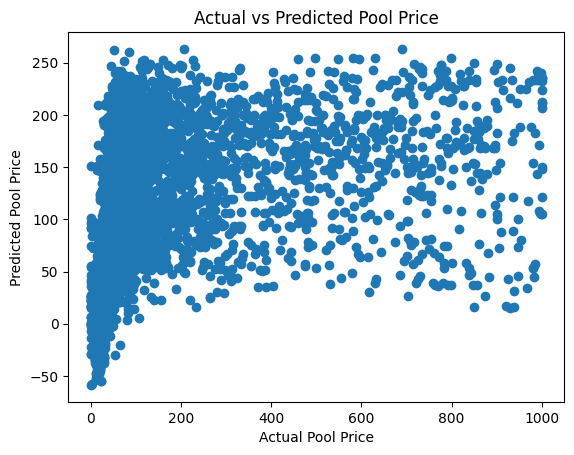

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score  # Importing the mean_squared_error function
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance


# Replace NaN values with zeros in production data
data = data.fillna(0)

# Preparing the data for modeling
X = data[['Temp Calgary deg C', 'AECO 2A CAD/GJ', 'Coal Gen', 'Gas Gen', 'Solar Gen', 'Wind Gen']]  # independent variables
y = data['AESO Pool Price CAD/MWh']  # dependent variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

# Get feature importances
feature_importances = perm_importance.importances_mean

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance:.4f}')

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

# Plotting the results
# Here we plot the predicted pool_price vs actual pool_price
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Pool Price')
plt.ylabel('Predicted Pool Price')
plt.title('Actual vs Predicted Pool Price')
plt.show()


Temp Calgary deg C: 0.0026
AECO 2A CAD/GJ: 0.0297
Coal Gen: 0.0064
Gas Gen: 0.1528
Solar Gen: 0.0366
Wind Gen: 0.1048
Random Forest Mean Squared Error: 8276.316635547357
Random Forest R-squared: 0.5027435431854367


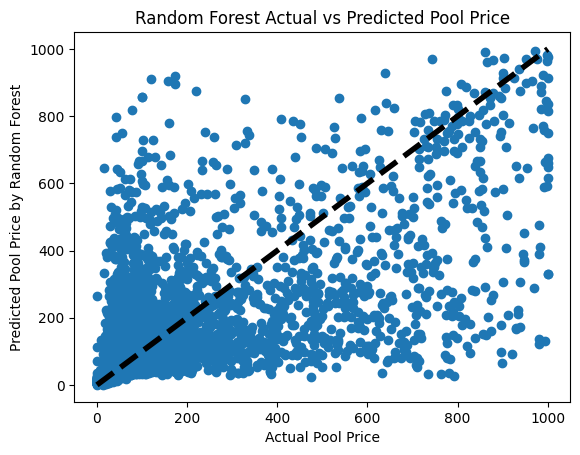

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance

# Handling NaN values using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(data[['Temp Calgary deg C', 'AECO 2A CAD/GJ', 'Coal Gen', 'Gas Gen', 'Solar Gen', 'Wind Gen']])

# Preparing the data for modeling
X = pd.DataFrame(X_imputed, columns=['Temp Calgary deg C', 'AECO 2A CAD/GJ', 'Coal Gen', 'Gas Gen', 'Solar Gen', 'Wind Gen'])  # independent variables
y = data['AESO Pool Price CAD/MWh'].dropna()  # dependent variable

# Ensure that the index aligns between X and y after dropping NaN values
X = X.loc[y.index]

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Creating the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=0)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluating the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=0)

# Get feature importances
feature_importances = perm_importance.importances_mean

# Print feature importances
for feature, importance in zip(X.columns, feature_importances):
    print(f'{feature}: {importance:.4f}')

print(f'Random Forest Mean Squared Error: {mse_rf}')
print(f'Random Forest R-squared: {r2_rf}')

# Plotting the results
plt.scatter(y_test, y_pred_rf)
plt.xlabel('Actual Pool Price')
plt.ylabel('Predicted Pool Price by Random Forest')
plt.title('Random Forest Actual vs Predicted Pool Price')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.show()

In [33]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.regularizers import l2

# Handling NaN values using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(data[['Temp Calgary deg C', 'AECO 2A CAD/GJ', 'Coal Gen', 'Gas Gen', 'Solar Gen', 'Wind Gen']])

# Preparing the data for modeling
X = pd.DataFrame(X_imputed, columns=['Temp Calgary deg C', 'AECO 2A CAD/GJ', 'Coal Gen', 'Gas Gen', 'Solar Gen', 'Wind Gen'])  # independent variables
y = data['AESO Pool Price CAD/MWh'].dropna()  # dependent variable

# Ensure that the index aligns between X and y after dropping NaN values
X = X.loc[y.index]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Creating the neural network model
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(l2=0.01)))  # Input layer and first hidden layer
model.add(Dense(5, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Making predictions
y_pred_nn = model.predict(X_test)

# Evaluating the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network Mean Squared Error: {mse_nn}')
print(f'Neural Network R-squared: {r2_nn}')


Epoch 1/100


c:\Users\gaoqian\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 361us/step - loss: 15132.5107
Epoch 2/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 2s 334us/step - loss: 12286.2451
Epoch 3/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 2s 377us/step - loss: 11592.5625
Epoch 4/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 2s 369us/step - loss: 11470.8408
Epoch 5/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 2s 335us/step - loss: 11731.2041
Epoch 6/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 2s 356us/step - loss: 11224.7568
Epoch 7/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 2s 366us/step - loss: 11399.7549
Epoch 8/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 2s 349us/step - loss: 11095.1826
Epoch 9/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 2s 348us/step - loss: 11185.0771
Epoch 10/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 2s 371us/step - loss: 10464.9648
Epoch 11/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 2s 373us/step - loss: 10833.4355
Epoch 12/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 2s 351us/step - loss: 10799.6689
Epoch 13/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 2s 325us/step - loss: 10646.5391
Epoch 14/100
6311/63

TypeError: If no scoring is specified, the estimator passed should have a 'score' method. The estimator <Sequential name=sequential_1, built=True> does not.

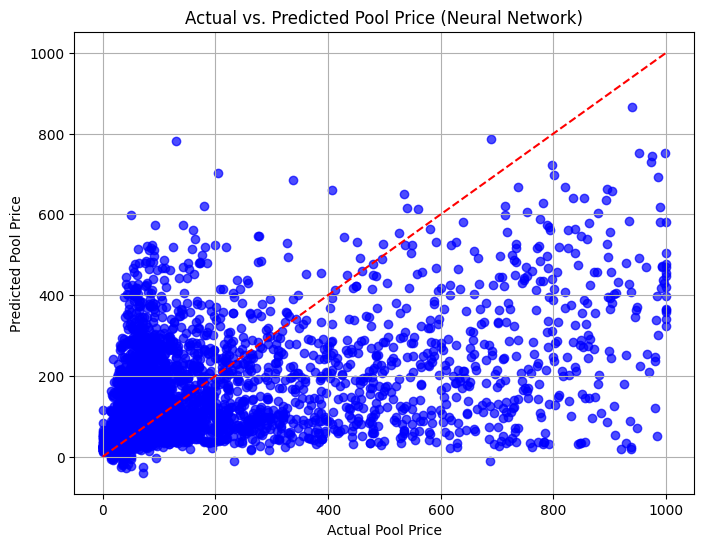

In [30]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_nn, color='b', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.xlabel('Actual Pool Price')
plt.ylabel('Predicted Pool Price')
plt.title('Actual vs. Predicted Pool Price (Neural Network)')
plt.grid(True)
plt.show()

In [45]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.regularizers import l2
from scikeras.wrappers import KerasRegressor
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

def build_model():
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Specify the input shape explicitly
    model.add(Dense(10, activation='relu', kernel_regularizer=l2(0.01)))  # Input layer and first hidden layer
    model.add(Dense(5, activation='relu'))  # Second hidden layer
    model.add(Dense(1, activation='linear'))  # Output layer
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model



# Handling NaN values using SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
X_imputed = imputer.fit_transform(data[['Temp Calgary deg C', 'AECO 2A CAD/GJ', 'Coal Gen', 'Gas Gen', 'Solar Gen', 'Wind Gen']])

# Preparing the data for modeling
X = pd.DataFrame(X_imputed, columns=['Temp Calgary deg C', 'AECO 2A CAD/GJ', 'Coal Gen', 'Gas Gen', 'Solar Gen', 'Wind Gen'])  # independent variables
y = data['AESO Pool Price CAD/MWh'].dropna()  # dependent variable

# Ensure that the index aligns between X and y after dropping NaN values
X = X.loc[y.index]

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# Wrap the model with KerasRegressor
model = KerasRegressor(model=build_model, epochs=100, batch_size=10, verbose=1)

# Use cross_val_score with a valid scoring parameter
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Train the model
model.fit(X_train, y_train)

# Making predictions
y_pred_nn = model.predict(X_test)

# Evaluating the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f'Neural Network Mean Squared Error: {mse_nn}')
print(f'Neural Network R-squared: {r2_nn}')

Epoch 1/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 410us/step - loss: 17862.2363
Epoch 2/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 410us/step - loss: 14762.4092
Epoch 3/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 415us/step - loss: 14378.0762
Epoch 4/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 416us/step - loss: 13776.6016
Epoch 5/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 426us/step - loss: 13655.6006
Epoch 6/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 431us/step - loss: 13094.1611
Epoch 7/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 436us/step - loss: 13132.7568
Epoch 8/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 438us/step - loss: 13302.4443
Epoch 9/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 453us/step - loss: 12812.7861
Epoch 10/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 446us/step - loss: 12876.7764
Epoch 11/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 448us/step - loss: 12411.7158
Epoch 12/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 442us/step - loss: 12230.6729
Epoch 13/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 3s 457us/step - loss: 12206.8848
Epoch 14

KeyboardInterrupt: 

100%|===================| 15766/15778 [00:27<00:00]        

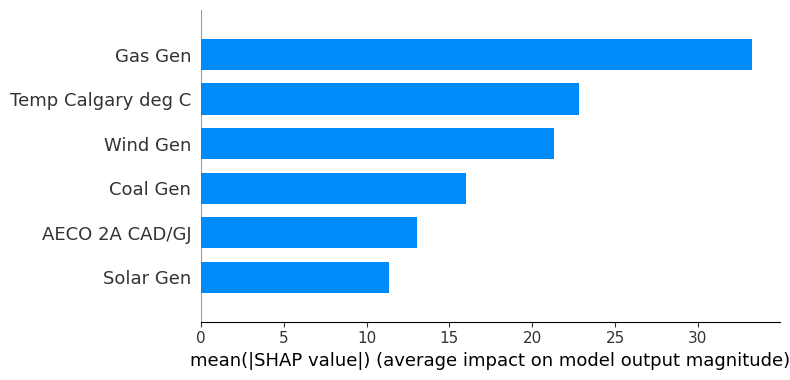

In [57]:
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split

# Replace NaN values with zeros in production data
data = data.fillna(0)

# Preparing the data for modeling
X = data[['Temp Calgary deg C', 'AECO 2A CAD/GJ', 'Coal Gen', 'Gas Gen', 'Solar Gen', 'Wind Gen']]  # independent variables
y = data['AESO Pool Price CAD/MWh']  # dependent variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.Explainer(model, X_train)

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_test)

# Visualize feature importance (e.g., summary plot)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)


In [59]:
import tensorflow as tf
import shap
from sklearn.model_selection import train_test_split

# Preparing the data for modeling
X = data[['Temp Calgary deg C', 'AECO 2A CAD/GJ', 'Coal Gen', 'Gas Gen', 'Solar Gen', 'Wind Gen']]  # independent variables
y = data['AESO Pool Price CAD/MWh']  # dependent variable

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the neural network
model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Create a SHAP explainer with a KernelExplainer and a specific masker
masker = shap.maskers.Impute(X_train)
explainer = shap.KernelExplainer(model.predict, masker)

# Compute SHAP values for test data
shap_values = explainer.shap_values(X_test)

# Visualize feature importance (e.g., summary plot)
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)


Epoch 1/100


c:\Users\gaoqian\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6311/6311 ━━━━━━━━━━━━━━━━━━━━ 5s 664us/step - loss: 476281.7500
Epoch 2/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 4s 707us/step - loss: 59270.2031
Epoch 3/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 5s 791us/step - loss: 38984.2930
Epoch 4/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 31014.4238
Epoch 5/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 5s 849us/step - loss: 24417.5117
Epoch 6/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 5s 757us/step - loss: 18182.6660
Epoch 7/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 4s 663us/step - loss: 13488.2764
Epoch 8/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 4s 681us/step - loss: 12523.6094
Epoch 9/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 4s 696us/step - loss: 12818.5244
Epoch 10/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 4s 668us/step - loss: 12737.6299
Epoch 11/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 4s 682us/step - loss: 12578.3496
Epoch 12/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 4s 705us/step - loss: 12469.7373
Epoch 13/100
6311/6311 ━━━━━━━━━━━━━━━━━━━━ 4s 691us/step - loss: 12565.0293
Epoch 14/100
6311/631